In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/rossmann-store-sales/train.csv")
train_df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)

In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_df = pd.read_csv("/content/drive/MyDrive/rossmann-store-sales/store.csv")
store_df.shape

(1115, 10)

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Sales: the turnover for a given day (our target y 
variable)

StateHoliday: indicates a state holiday. Normally 
all stores, with few exceptions, are closed on state 
holidays. Note that all schools are closed on public 
holidays and weekends. a = public holiday, b = Easter 
holiday, c = Christmas, 0 = none

SchoolHoliday: indicates if the (Store, Date) was 
affected by the closure of public schools

Customers: the number of customers on a given day
• Open: an indicator for whether the store was open: 
0 = closed, 1 = open

StoreType: differentiates between four different store 
models: a, b, c, d
Assortment: describes an assortment level: a = basic, 
b = extra, c = extended
CompetitionDistance: distance in meters to the 
nearest competitor store
CompetitionOpenSince[Month/Year]: gives the 
approximate year and month of the time the nearest 
competitor was opened
Promo: indicates whether a store is running a promo 
on that day
Promo2: Promo2 is a continuing and consecutive 
promotion for some stores: 0 = store is not 
participating, 1 = store is participating

Promo2Since[Year/Week]: describes the year and 
calendar week when the store started participating in 
Promo2
• PromoInterval: describes the consecutive intervals 
at which Promo2 is started, naming the months the 
promotion is started anew (e.g., “Feb, May, Aug, Nov” 
means each round starts in February, May, August, and 
November of any given year for that store)

To have all the data points together, we need to create one single 
dataframe with the store and promotion features. We can achieve this by 
joining the two dataframes on the ‘store’ column, which represents the 
store ID.

In [6]:
df_new = train_df.merge(store_df,on=["Store"], how="inner")
print(df_new.shape)


(1017209, 18)


How 
many stores do we have the data for? How long do we have the data for? 
What do the average sales for a day look like? are the stores very different 
from each other in daily sales?

We will start by finding the number of unique stores in the data, the 
number of unique days for which we have data, and the average sales for 
all stores.

In [7]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new ["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [8]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [10]:
#We can extract all date properties from a datetime datatype
import numpy as np
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [11]:
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",np.where(df_new["Month"].isin([6,7,8]), "Summer",
 np.where(df_new["Month"].isin ([9,10,11]),"Fall",np.where(df_new["Month"].isin ([12,1,2]),"Winter","None"))))

In [12]:
#Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


In [13]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

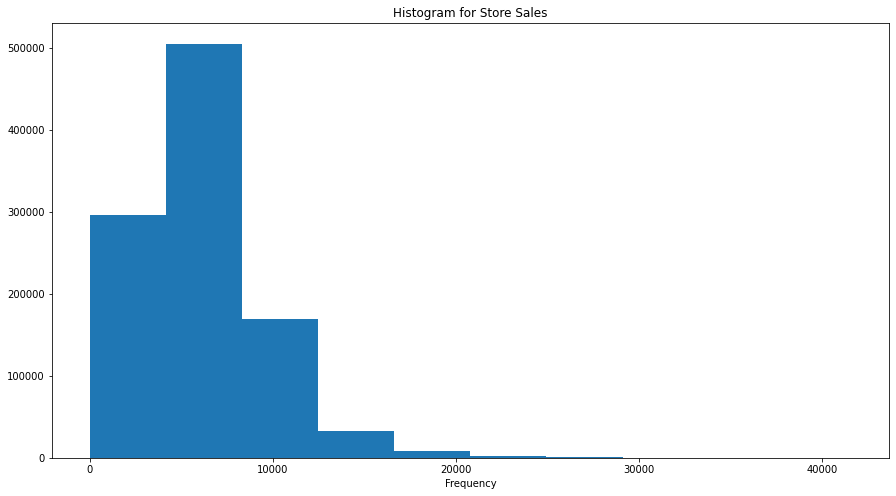

In [14]:
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

# most of the stores have sales in the range 0–20,000, and just a few stores 
have sales greater than 20,000. It might be worthwhile to remove these 
outliers, as it helps the model learn better.

#### Exploring new columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2300823d0>,
      dtype=object)

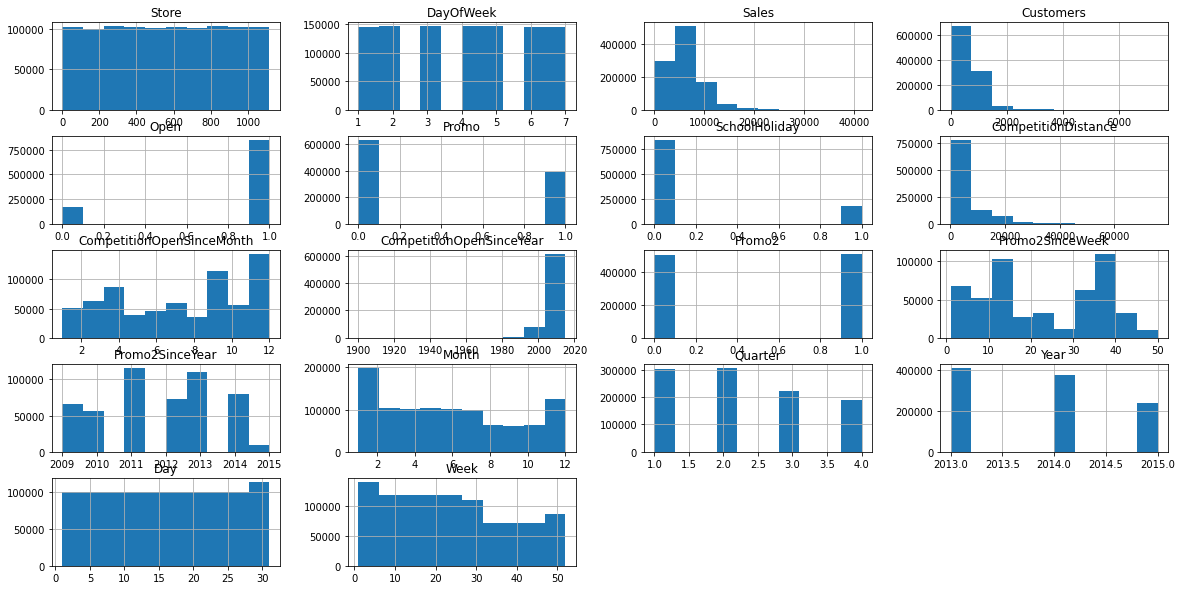

In [15]:
df_new.hist(figsize=(20,10))

In [16]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [17]:
#Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

Categorical Features

In [18]:
import seaborn as sns
sns.set(style="whitegrid")

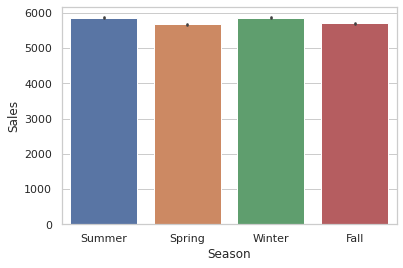

In [19]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

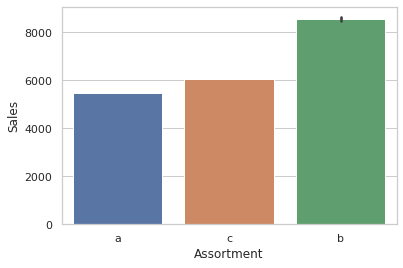

In [20]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)


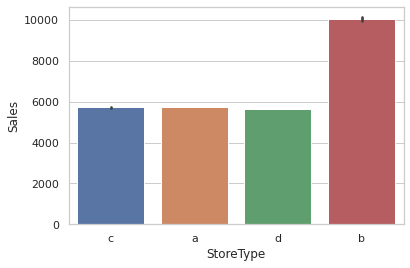

In [21]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

Sales across seasons barely seem to 
differ; however, there seems to be an increasing trend for sales across 
assortments. Stores with assortment “b” generally have the highest sales. 
Store type also shows a unique relationship with sales across store types. 
We can see fairly higher sales for “b” store types also.

What if the number of stores in the different 
types mentioned in the preceding is disproportionate or skewed? 

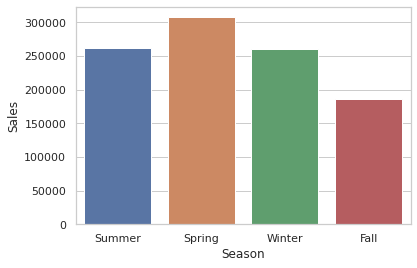

In [22]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size)

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=np.size)

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, estimator=np.size)

the distribution of data points across different 
classes within a category is skewed. A simple check on StoreType and 
Assortment reveals that b has a significantly lower number of stores or 
data points in the dataset. Therefore, our initial understanding of the 
relationships observed is not true.

 prepare the data for developing DL models.

In [ ]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2", "StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

In [ ]:
#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
 le = LabelEncoder()
 a=le.fit_transform(df_new[col]).reshape(-1,1)
 ohe = OneHotEncoder(sparse=False)
 column_names = [col+ "_"+ str(i) for i in le.classes_]
 return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [ ]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
 temp_df = create_ohe(df_new,column)
 temp = pd.concat([temp,temp_df],axis=1)

In [ ]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

In [ ]:
print(temp.columns[temp.dtypes=="object"])

In [ ]:
temp["StateHoliday"].unique()

The feature seems to have incorrect values. Ideally, StateHoliday
should have either a 0 or 1 as the possible values to indicate whether it is a 
holiday or not. Let’s repair the feature by replacing all values of “a,” “b,” and 
“c” with 1 and the rest with 0, therefore converting the variable as numeric

In [ ]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

In [ ]:
from sklearn.model_selection import train_test_split
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp, 
df_new[target],test_size=0.2,random_state=2018)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

 design the DNN architecture

create a baseline score as the bare minimum score to consider the model useful

To define the model baseline performance, we should consider the mean 
of the target variable in the training dataset as the prediction for all test 
samples

In [ ]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

In [ ]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

Baseline performance is 2883.58

# DNN 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu")) # total 44 features
model.add(Dense(1,activation = "linear"))

In [ ]:
model.compile(optimizer='adam',loss="mean_absolute_error",metrics=["mean_absolute_error"])

In [ ]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data= (x_val,y_val),epochs=10,batch_size=64)

It takes a batch of 64 training samples in an iteration, passes 
each sample through the network, and measures the loss metric that we 
defined. It uses the optimization technique we configured to update the 
model weights and repeats till the last batch for one epoch. The entire 
process is repeated ten times, since we set number of epochs as ten. At the 
end of each epoch, the model uses the validation dataset to evaluate and 
report the metrics we configured.

The model performance on the validation dataset is 682 which is an approvement over the baseline 

In [ ]:
 model.evaluate(x_test.values,y_test.values)

MAE on the test dataset is 679 which is quite close to the validation MAE.

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val, y_val),epochs=10,batch_size=64)

In [ ]:
model.evaluate(x_test,y_test)

Increasing the layers reduced MAE to 645


In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [ ]:
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)

In [ ]:
 model.evaluate(x_test,y_test)

MAE further reduced to 612 when the model made more deep.

Increasing the number of neurons

In [ ]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [ ]:
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)

In [ ]:
 model.evaluate(x_test,y_test)

In [ ]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))